Link - https://www.kaggle.com/datasets/stealthtechnologies/bear-attacks-north-america

C:\Users\afraz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


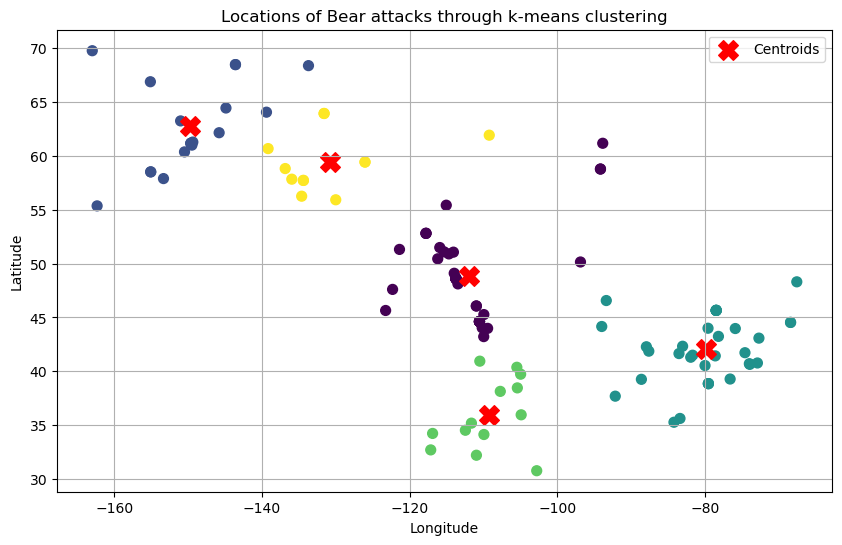

Cluster Centers (Original):
[[-111.95199093   48.83863809]
 [-149.71130719   62.73943885]
 [ -79.83364      42.09696476]
 [-109.30907361   35.96237723]
 [-130.8427836    59.45743752]]
Cluster Counts:
Cluster
0    42
2    34
1    19
3    13
4    12
Name: count, dtype: int64


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('TBA2.csv')
# TBA2 is a dataset containing the location, date, and age of fatal bear attack victims. It has categorical and numerical data with missing age,
# latitude, and longitude, and gender rows. The missing ages are replaced with the mean of the column and the missing genders are assumed to be the 
# mode of the column. Missing Latitude and Longitude rows were deleted as they couldn't be verified. The following code is to determine central
# points of bear attacks based on past records.

df = df.dropna(subset=['Latitude', 'Longitude'])
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

numerical_features = ['Longitude', 'Latitude']
X = df[numerical_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


k = 5 # Selected as there appear to be 5 centralized locations based on a quick overlook.
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_longitude = centroids[:, 0]  # First column for Longitude
centroid_latitude = centroids[:, 1]    # Second column for Latitude

plt.figure(figsize=(10, 6))
plt.scatter(X['Longitude'], X['Latitude'], c=df['Cluster'], cmap='viridis', s=50)

plt.scatter(centroid_longitude, centroid_latitude, 
            s=200, c='red', label='Centroids', marker='X')
plt.title('Locations of Bear attacks through k-means clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

print(f'Cluster Centers (Original):\n{scaler.inverse_transform(kmeans.cluster_centers_)}')
print(f'Cluster Counts:\n{df["Cluster"].value_counts()}')

# The location of bear locations are clustered around 5 major regions. Overlapping them with a photo of the region from google maps present the 
# clusters to be around Alaska, NorthWest Territories, Sasketchewan, Colorado, and Pennsylvania. 